# Mentoring 3 -- Classification Model (Credit Risk loan_status)
---



Mentoring Session - Job Preparation Program - Pacmann AI

## Instructions
---

Credit Risk : The possibility of a loss resulting from a borrower's failur to repay a loan or meet contractial obligations.

Task Description

1. Case :
- You are working as a data scientist in a risk analyst team in a finance industry.
- your company generates profit by giving loans to customers
- However, your company might suffer loss if the customer did not pay the loan back (we called it as default customer)
- to minimize the loss, the simple thing to do is to prevent bad applicants (who later become a default customer) get the loan.
- As a data scientist, you want to create a classifier model to classify good or bad applicants from the given customer data to minimize the potential loss

2. Modeling task:
- Task 1: Data preparation (score 30)
    Load the dataset correctly.
    Split the dataset for further tune the model & predict correctly.
    Perform EDA and conclude the data preprocessing plan from that.
    Perform data preprocessing according to plan.

- Task 2: Modeling (45)
    Define the metrics (you can use more than 1 metrics, just explain why) for optimizing the model.
    Define your baseline model (explain why) and print out the score that you want to beat.
    do a proper best model search & hyperparameter tuning (explain why you choose those models and why you choose those hyperparameter)
    Define your best model (explain why).

- Task 3: Model evaluation (score: 30)
    how does your best model perform in the test data? is your best model good?
    compare the financial impact between your best model & baseline model. is your best model better than the baseline model?
    assumptions:
	    if you falsely predict good applicants as bad, you would lose potential revenue of RP 10.000.000/applicant on average.
	    if you falsely predict bad applicants as bad, you would lose RP 35.000.000/applicant on average.

## Dataset Description
---

**Note**

- This dataset is downloaded from [Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset)
- The target variable is **loan_status (0 is non default, 1 is default)**


**Description**
- We're looking to predict the rent price of a house
- The dataset contains of the following fields

<center>

|Feature|Type|Descriptions|
|:--|:--|:--|
|`person_age`|`int`|The age of the Customers|
|`person_income`|`int`|The income customers|
|`person_home_ownership`|`str`|Home ownership status can reflect stability and financial responsibility.|
|`person_emp_length`|`int`|Employment length may indicate job stability and reliability in income|
|`loan_intent`|`str`|Purpose of the loan can provide insights into the borrower's financial goals and intentions.|
|`loan_grade`|`str`|Loan grade represents the credit risk associated with the loan.|
|`loan_amnt`|`int`|Loan amount is the amount requested by the borrower and can affect repayment capability.|
|`loan_int_rate`|`float`|Loan interest rate affects the total cost of the loan and repayment terms.|
|`loan_percent_income`|`float`| The percentage of the loan amount relative to the borrower's income can indicate the borrower's debt burden.|


**Exclusion:**
|Feature|Type|Descriptions|
|:--|:--|:--|
|`cb_person_default_on_file`|`str`|-|
|`cb_person_cred_hist_length`|`int`|The income customers|
<center>

## Modeling Workflow / Modeling Task
---

```
1.1 Import data to Python
1.2 Split the dataset into Input-Output data
1.3 Split the dataset into Train-Valid-Test set
1.4 Perform EDA on the dataset for data preprocessing plan.
1.5 Create the preprocess function for other input data (X_valid, & X_test).
1.6 Training the data with baseline model
```

### 1.1 Import data to Python
---

In [1]:
####################################################
# Import Numpy and Pandas library
####################################################
import numpy as np
import pandas as pd

# Import train-test splitting library dari sklearn (scikit learn)
from sklearn.model_selection import train_test_split

/var/folders/t3/fw9vwjtx1nx7g5w7l0fsjtw80000gp/T/ipykernel_14317/4078079578.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
####################################################
# Create a function named read_data
# - Has an input of filename, i.e. fname
# - Read the data as a Pandas DataFrame
# - Drop duplicate on `url`, keep the last ones
# - Drop col `names` and `url`
# - Print the data shape
# - Return the dataset
# Write your code here (4 pts)
####################################################
def read_data(fname):
    """ 
    This function for import data into pandas dataframe,
    for later to be trained into a model Machine Learning

    Candra Kurniawan | Pacmann AI 2024.
    
    """
    # Import the data from local computer into dataframe

    # mencari file dengan kata belakang .xlsx
    if fname.endswith('.xlsx'):
        df = pd.read_excel(fname)

    # mencari file dengan kata belakang .csv
    elif fname.endswith('.csv'):
        df = pd.read_csv(fname, sep = ',')

    # jika tidak ada file xlsx dan csv maka akan Raise Error
    else:
        raise ValueError(f"File tidak ditemukan {fname} harus berbentuk .xlsx atau .csv")

    # drop the columns that we did not need to include in Training the model
    df.drop(columns=['cb_person_default_on_file'], inplace=True)
    df.drop(columns=['cb_person_cred_hist_length'], inplace=True)
    
    # drop duplicate data with subset = 'person_age' and keep last data
    df.drop_duplicates(keep='last', inplace=True)
    
    return df

In [3]:
# Read the credit-risk data
data = read_data(fname='credit_risk_dataset.csv')

In [4]:
# show the dataset in pd.DataFrame
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55


In [5]:
# check the data shape always
data.shape

(31879, 10)

In [6]:
data.duplicated().sum()

0

In [7]:
# check the data shape always
data.shape

(31879, 10)

### 1.2 Split the dataset into input and output.
---

Split into input and output dataset.

- We're going to split input & output according to the modeling objective.
- Create a function to split the input & output

In [8]:
####################################################
# Create a function named split_input_output
# - Has two arguments
#   - data, a pd Dataframe
#   - target_col, a column (str)
# - Print the data shape after splitting
# - Return X, y
####################################################

def split_input_output(data, target_col):
    """  
    This function for splitting data into input for train data (X) 
    and output for target/predict data (y).

    Specs : -> has two arguments
                1. data (pd.DataFrame)
                2. target_col (column pandas)
            -> Print the data.shape after splitting
            -> Then, Returning the value of X and y

    Returning : -> Data input that will be trained further in (X)
                -> And data target output that will be performed analysis/predict in (y).

    """
    # Splitting the data into input (X) and output (y)
    X = data.drop(target_col, axis = 1)
    y = data[target_col]

    # Print the shape of the data after splitting
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")

    return X, y

In [9]:
# Load the train data only (JUST RUN THE CODE)
X, y = split_input_output(data=data,
                          target_col='loan_status')

X shape: (31879, 9)
y shape: (31879,)


In [10]:
# Melakukan check apakah terdapat missing values pada dataframe
data.isna().sum() 

person_age                  0
person_income               0
person_home_ownership       0
person_emp_length         875
loan_intent                 0
loan_grade                  0
loan_amnt                   0
loan_int_rate            3050
loan_status                 0
loan_percent_income         0
dtype: int64

In [11]:
# Check data Input with .head() function
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55


In [12]:
# Check data output with .head() function
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [13]:
# Let's check the proportion of out target output
# so we can check is it balance or imbalance the target output data.

y.value_counts(normalize=True)

loan_status
0    0.781518
1    0.218482
Name: proportion, dtype: float64

### 1.3 Split the dataset into Train-Valid-Test sets.
---

Split into Train-valid-test set

We want to split the data into three set:
- Train, for training the model
- Validation, for choosing the best model
- Test, for error generalization

The proportion to make the splitting data is train-set (80%), valid-set (10%), and test-set (10%).

In [14]:
####################################################
# Create a function named split_train_test
# - Has two arguments
#   - X, the input (pd.Dataframe)
#   - y, the output (pd.Dataframe)
#   - test_size, the test size between 0-1 (float)
#   - seed, the random state (int)
# - Print the data shape after splitting
# - Return X_train, X_test, y_train, y_test
# - You can use an sklearn library to help you
####################################################

def split_train_test(X, y, test_size, seed):
    """  
    This function for splitting the input and output data into
    Training, validation, and test dataset.

    Specs : -> Has four arguments:
                1. X = the input (pd.DataFrame)
                2. y = the output (pd.DataFrame)
                3. test_size = the test size between 0 - 1 (float)
                4. seed = the random state (int)
                5. stratify = This arguments is used for representative our 
                    imbalance output dataset. we set it (y) the output data.
            -> Print the data shape after splitting
            -> Then return the X_train, X_test, y_train, y_test

    Returning : X_train -> data input as (X) for training data
                X_test -> data input as (X) for test data
                y_train -> data output as (y) for training data
                y_test -> data output as (y) for test data
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = test_size, 
                                                        random_state = seed,
                                                        stratify=y)
    return X_train, X_test, y_train, y_test


In [15]:
# Splitting the dataset into training set
# Then split again 10% into valid and test set

# First, split the train & not train
X_train, X_not_train, y_train, y_not_train = split_train_test(X, y, 0.2, 123)

# Then, split the valid & test
X_valid, X_test, y_valid, y_test = split_train_test(X_not_train, y_not_train, 0.5, 123)

print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_not_train.shape}")
print(f"y test shape: {y_not_train.shape}")
print('')
print(f"X valid shape: {X_valid.shape}")
print(f"y valid shape: {y_valid.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (25503, 9)
y train shape: (25503,)
X test shape: (6376, 9)
y test shape: (6376,)

X valid shape: (3188, 9)
y valid shape: (3188,)
X test shape: (3188, 9)
y test shape: (3188,)


In [16]:
# Validate our proportion train, valid, and test sets.
# Train-data (80%) , Valid-data (10%), Test-data (10%)
print(len(X_train)/len(X))  # should be 0.8
print(len(X_valid)/len(X))  # should be 0.1
print(len(X_test)/len(X))   # should be 0.1

0.7999937262774868
0.10000313686125663
0.10000313686125663


In [17]:
# Check out input Train dataset
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income
16209,22,16800,MORTGAGE,0.0,DEBTCONSOLIDATION,C,4750,13.85,0.28
774,23,84000,RENT,7.0,PERSONAL,B,20000,11.11,0.24
24870,30,77500,MORTGAGE,2.0,DEBTCONSOLIDATION,A,9000,7.88,0.12
24664,28,68496,RENT,8.0,PERSONAL,B,10000,NaN,0.15
22909,29,60000,MORTGAGE,2.0,HOMEIMPROVEMENT,C,6000,13.49,0.10


In [18]:
# Check out output Train dataset
y_train.head()

16209    1
774      0
24870    0
24664    0
22909    0
Name: loan_status, dtype: int64

### 1.4 Perform EDA before Preprocessing
---

Before training the model, we may need to perform preprocessing steps such as: 
 - handling missing values, 
 - encoding categorical variables, 
 - scaling numerical features, 
 - and feature engineering.

 **First, we check and handle the missing values**

In [19]:
100 * (X_train.isna().sum(0) / len(X_train))

person_age               0.000000
person_income            0.000000
person_home_ownership    0.000000
person_emp_length        2.803592
loan_intent              0.000000
loan_grade               0.000000
loan_amnt                0.000000
loan_int_rate            9.583186
loan_percent_income      0.000000
dtype: float64

- We can see from output above there is a missing values in the Features/columns **'person_emp_length'** and **'loan_int_rate'**

- so we will Impute the missing values above

- Before we crosscheck with EDA, we need separate the Numerical and categorical values so we can use Histogram to see the Distribution of the X Data

**Split columns numerical and Categorical**

    - we make function to separate Numerical and categorical features (columns)
    - so we can see the distribution of the values
    - for EDA.

In [20]:
# Function for splitting into data numerical and categorical
###
def split_column_numcat(data, num_cols, cat_cols):
      """
      This is a function for splitting the Training data column into
      Numerical and Categorical column :

      Parameters:
         - data, an input data (pd. Dataframe)
         - num_cols, a list of numerical columns (list)
         - cat_cols, a list of categorical columns (list)
         - and write a validation that perform right operation
         - and return two dataframe, numerical & categorical data

      Return:
         - numerical_data : pd.DataFrame that inside of numerical columns.
         - categorical_data: pd.DataFrame that inside of categorical columns.
         
      Candra Kurniawan , Pacmann AI
      """
      numerical_data = data[num_cols]
      categorical_data = data[cat_cols]

      print(f"Data num shape : {numerical_data.shape}")
      print(f"Data cat shape : {categorical_data.shape}")

      return numerical_data, categorical_data



In [21]:
# Listing the Numerical Columns to select
X_train_num_columns = ['person_age', 
                       'person_income', 
                       'person_emp_length', 
                       'loan_amnt', 
                       'loan_int_rate', 
                       'loan_percent_income']

# This one for listing all the dataset X_train columns
X_train_columns = list(X_train.columns)

# Then, using all X_train columns we can get the difference of the columns inside
# Variable 'X_train_num_columns'
X_train_cat_columns = list(set(X_train_columns).difference(set(X_train_num_columns)))

print(X_train_cat_columns)


['loan_intent', 'loan_grade', 'person_home_ownership']


In [22]:
# Perform the Split the data num & cat function
X_train_num, X_train_cat = split_column_numcat(data = X_train, 
                                               num_cols = X_train_num_columns, 
                                               cat_cols = X_train_cat_columns)

Data num shape : (25503, 6)
Data cat shape : (25503, 3)


In [23]:
# Check the data X_train_num
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
16209,22,16800,0.0,4750,13.85,0.28
774,23,84000,7.0,20000,11.11,0.24
24870,30,77500,2.0,9000,7.88,0.12
24664,28,68496,8.0,10000,NaN,0.15
22909,29,60000,2.0,6000,13.49,0.10


In [24]:
# Check the data X_train_cat
X_train_cat.head()

,loan_intent,loan_grade,person_home_ownership
16209,DEBTCONSOLIDATION,C,MORTGAGE
774,PERSONAL,B,RENT
24870,DEBTCONSOLIDATION,A,MORTGAGE
24664,PERSONAL,B,RENT
22909,HOMEIMPROVEMENT,C,MORTGAGE


**Now, let's go perform the EDA Process**

    - handling missing values, 
    - encoding categorical variables, 
    - scaling numerical features, 
    - and feature engineering.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

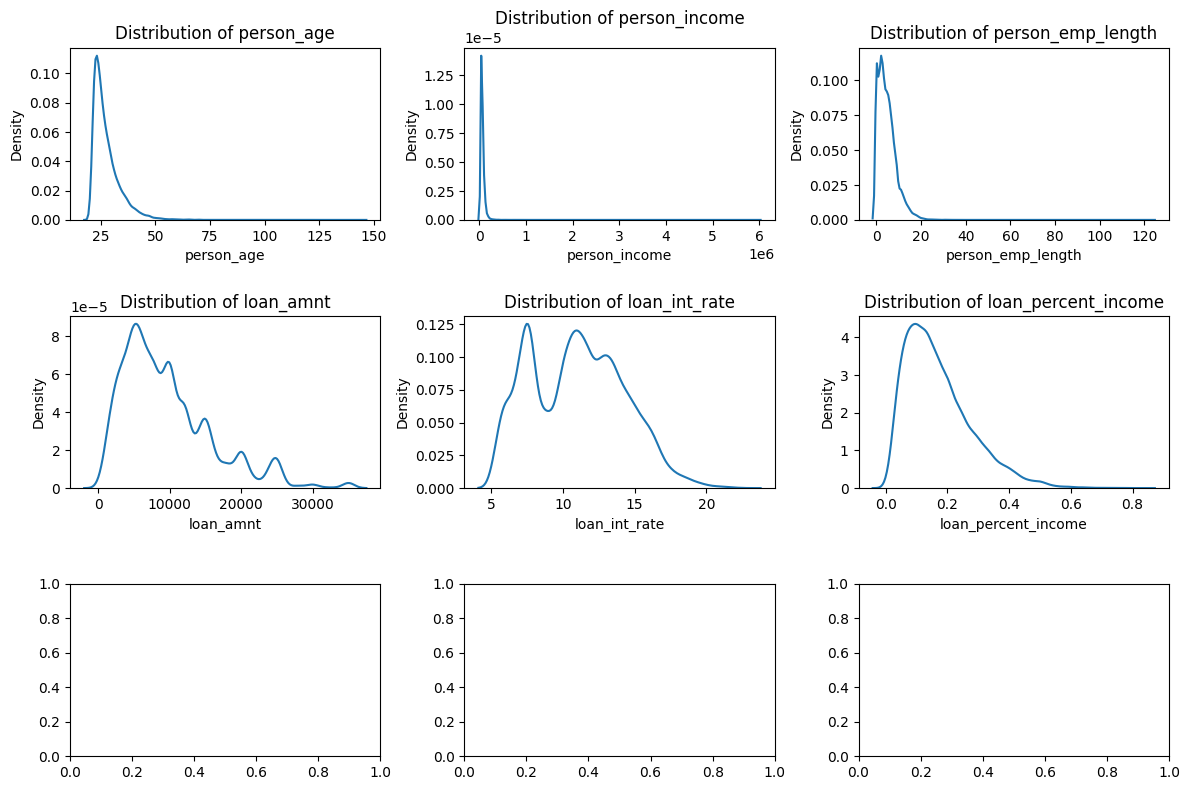

In [26]:
# Plot histogram
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train_num.columns):
    sns.kdeplot(X_train_num[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Summary:

 - We can see there is Anomalies in each Features, they have Skewed distribution.
 - First lets do `.describe()` function to see the Statistics of the data.
 - Then, We may try to clean the data if there is any Outlier.
 - After that, we'll use median to imput the missing values.


In [27]:
X_train_num.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
count,25503.000000,2.550300e+04,24788.000000,25503.000000,23059.000000,25503.000000
mean,27.703211,6.582516e+04,4.760650,9573.036506,11.009509,0.170485
std,6.344991,6.334205e+04,4.163359,6303.038610,3.248790,0.107107
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,7.900000,0.090000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000
75%,30.000000,7.900000e+04,7.000000,12112.500000,13.470000,0.230000
max,144.000000,6.000000e+06,123.000000,35000.000000,22.480000,0.830000


In [28]:
X_train_cat.describe()

,loan_intent,loan_grade,person_home_ownership
count,25503,25503,25503
unique,6,7,4
top,EDUCATION,A,RENT
freq,5018,8446,12931


- `person_age` We find the outlier in the columns

    After i researching within this dataset, there is 5 customer with age above `100`.
    And there is one customer with `144` age and the `person_income` is Anomalies.
    So, i am thinking to drop this `person_age with >= 100`.

In [29]:
# Find out about the outlier in the person_age columns
# I found out there is possibly 5 customer with anomalies Age
# And 1 customer with person_income too high 600_000
X_train_num[X_train_num['person_age'] >= 90]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
81,144,250000,4.0,4800,13.57,0.02
183,144,200000,4.0,6000,11.86,0.03
747,123,78000,7.0,20000,NaN,0.26
32297,144,6000000,12.0,5000,12.73,0.00
575,123,80004,2.0,20400,10.25,0.25


- `person_income` We find the outlier in the columns

    After i researching within this dataset, there is 6 customer with `person_income`above `1_000_000`.
    So, i am thinking to drop this `person_income with > 1_000_000`.

In [30]:
# find out Anomalies in the person_income
len(X_train_num[X_train_num['person_income'] > 1_000_000])

6

In [31]:
# find out Anomalies in the person_income
X_train_num[X_train_num['person_income'] > 1_000_000]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
30049,42,2039784,0.0,8450,12.29,0.00
32546,60,1900000,5.0,1500,NaN,0.00
29120,40,1200000,1.0,10000,NaN,0.01
31922,47,1362000,9.0,6600,7.74,0.00
32297,144,6000000,12.0,5000,12.73,0.00
31924,44,1440000,7.0,6400,7.40,0.00


- `person_emp_length` We find the outlier in the columns

    After i researching within this dataset, there is 3 customer with `person_emp_length`above `40`.
    So, i am thinking to drop this `person_emp_length with >= 40`.

In [32]:
# find out Anomalies in the person_income
len(X_train_num[X_train_num['person_emp_length'] >= 40])

3

In [33]:
# find out Anomalies in the person_income
X_train_num[X_train_num['person_emp_length'] >= 40]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
32355,78,48000,41.0,3000,7.51,0.06
210,21,192000,123.0,20000,6.54,0.10
0,22,59000,123.0,35000,16.02,0.59


- `loan_amnt` We find the outlier in the columns

    After i researching within this dataset, there is `139` customer with `loan_amnt`above `35000`.
    So, i am thinking to drop this `loan_amnt with >= 35000`.

In [34]:
# find out Anomalies in the loan_amnt
len(X_train_num[X_train_num['loan_amnt'] >= 35000])

139

In [35]:
# find out Anomalies in the loan_amnt
X_train_num[X_train_num['loan_amnt'] >= 35000]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
27106,27,122880,3.0,35000,8.49,0.28
15300,25,130000,9.0,35000,NaN,0.27
13575,22,94000,6.0,35000,15.23,0.37
17865,33,250000,0.0,35000,7.29,0.14
17843,34,89000,3.0,35000,18.25,0.39
...,...,...,...,...,...,...
17838,28,80000,12.0,35000,15.62,0.44
113,26,213000,6.0,35000,10.65,0.16
17885,31,305000,0.0,35000,17.58,0.11
12220,24,74000,8.0,35000,20.11,0.47


- We create a function to get all the Indexes to Dropped the Anomalous data 

In [36]:
##################################################
# Function for get the indexes with data Anomalies
##################################################

def index_to_drop(data):
    """ 
    Function to store data index that will droppped 

    Parameter:  -> data =  X_train_num
   
    Returning:  -> selected_indexes = list of index that will,
                                be used for dropping data.

    Candra Kurniawan | Pacmann AI 2024.

    """
    # For create later function to drop Anomalies data / Outlier data.
    selected_indexes = data.index.values[
                (data['person_age'] >= 90) | 
                (data['person_income'] > 1_000_000) | 
                (data['person_emp_length'] >= 40) | 
                (data['loan_amnt'] >= 30_000)
                ]
    
    #print(selected_indexes)
    
    return selected_indexes

In [37]:
# Apply the function to get list of indexes to drop the ANomalous Data.
idx_to_drop = index_to_drop(X_train)

# Check the length of indexes
print(f'Number of index to drop:', len(idx_to_drop))
#print(idx_to_drop)

Number of index to drop: 261


In [38]:
# Before we dropped the Anomalous data
# we save the shape of Original X_train_num, X_train_cat & y_train shape

print(f"Shape original X_train: {X_train.shape}")
print(f"Shape original y_train: {y_train.shape}")
print(f" ")
print(f"Shape original X_train_num: {X_train_num.shape}")
print(f"Shape original X_train_cat: {X_train_cat.shape}")
print(f"Shape original y_train: {y_train.shape}")

Shape original X_train: (25503, 9)
Shape original y_train: (25503,)
 
Shape original X_train_num: (25503, 6)
Shape original X_train_cat: (25503, 3)
Shape original y_train: (25503,)


- Now, lets drop the data for X_train_num, X_train_cat, & also y_train

In [39]:
######################################################################
# Drop the anomalous data
# Save the dropped data into X_train_num_dropped, X_train_cat_dropped
# and y_train_dropped
######################################################################

# Drop rows based on index values
X_train_num_dropped = X_train_num.drop(idx_to_drop)
X_train_cat_dropped = X_train_cat.drop(idx_to_drop)
y_train_dropped = y_train.drop(idx_to_drop)

print(f"Shape after dropped X_train_num: {X_train_num_dropped.shape}")
print(f"Shape after dropped X_train_cat: {X_train_cat_dropped.shape}")
print(f"Shape after dropped y_train: {y_train_dropped.shape}")

Shape after dropped X_train_num: (25242, 6)
Shape after dropped X_train_cat: (25242, 3)
Shape after dropped y_train: (25242,)


In [40]:
# a little bit of checking 
X_train_num_dropped.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
count,25242.000000,25242.000000,24527.000000,25242.000000,22830.000000,25242.000000
mean,27.658347,64539.736867,4.735638,9341.463632,10.995633,0.169299
std,6.131961,45185.096745,4.013859,5879.661471,3.237525,0.106195
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000
25%,23.000000,38400.000000,2.000000,5000.000000,7.900000,0.090000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.150000
75%,30.000000,78000.000000,7.000000,12000.000000,13.470000,0.230000
max,80.000000,948000.000000,38.000000,29850.000000,22.480000,0.830000


**After we successfully dropped the Anomalous data**
    
    - Now we want to Impute the missing values in the X_train_num & X_train_cat
    - We want using median to impute the missing values


**First we imputer the Numerical data**

In [41]:
from sklearn.impute import SimpleImputer

X_train_num_dropped.isna().sum()

person_age                0
person_income             0
person_emp_length       715
loan_amnt                 0
loan_int_rate          2412
loan_percent_income       0
dtype: int64

In [42]:
X_train_num_dropped.shape

(25242, 6)

- Create a function to fit a numerical features imputer

In [43]:
####################################################
# Function for imputing Numerical values
####################################################

def num_imputer_fit(data):
    """
    Function to fit & transform numerical imputers
    it needs 1 input, the data (pd.DataFrame)
      - the missing value is np.nan
      - the imputation strategy is median
      - it return the imputer

    Parameter : 
    1. data -> X_train_num_dropped

    Returning:
    1. imputer_fit_numerical -> object to Fit the dataset

    Candra Kurniawan | Pacmann AI 2023-2024.
    """

    imputer_fit_numerical = SimpleImputer(missing_values = np.nan,
                                strategy = 'median')
    
    # fit the imputer into dataset
    imputer_fit_numerical.fit(data)

    return imputer_fit_numerical

def num_imputer_transform(imputer_fit_numerical, data):
    """  
    The transform function is called by num_imputer_transform,
        - it needs 2 input, data (pd.DataFrame) and imputer (sklearn object)
        - it return the imputed data in pd.DataFrame format

    Parameters:
    1. imputer_fit_numerical
    2. data -> X_train_num_dropped

    Return:
    1. X_train_num_imputed = Data that has been successfully transformed.

    Candra Kurniawan | Pacmann AI 2023 - 2024.
    """
    # begin the transform
    imputed_data = imputer_fit_numerical.transform(data)

    # After success Transform, then make it to a Dataframe Format
    X_train_num_imputed = pd.DataFrame(imputed_data, columns=data.columns, index=data.index)

    return X_train_num_imputed


- Perform imputation

In [44]:
# Get the numerical imputer
num_imputer = num_imputer_fit(X_train_num_dropped)

# Transform the data
X_train_num_imputed = num_imputer_transform(num_imputer, X_train_num_dropped)

In [45]:
# Validate
X_train_num_imputed.isna().sum(0)

# Success imputing Done

person_age             0
person_income          0
person_emp_length      0
loan_amnt              0
loan_int_rate          0
loan_percent_income    0
dtype: int64

**Second, we imputer the Categorical data**
    
    - Because there is no missing values when we check in the X_train_cat_dropped
    - We can skip the imputer cat process.
    - But i still choose to use the process impute categorical data
    - And if you see below , there is missing data in column `loan_intent` 
    - And i already try to imputed it, but it said the missings data is not a NaN values.



In [46]:
# Check missing value (JUST RUN THE CODE)
X_train_cat_dropped.value_counts(normalize=True)

loan_intent        loan_grade  person_home_ownership
MEDICAL            B           RENT                     0.037358
EDUCATION          B           RENT                     0.032406
                   A           MORTGAGE                 0.032208
PERSONAL           B           RENT                     0.030386
DEBTCONSOLIDATION  A           MORTGAGE                 0.029831
                                                          ...   
MEDICAL            C           OTHER                    0.000040
HOMEIMPROVEMENT    E           OTHER                    0.000040
DEBTCONSOLIDATION  G           OWN                      0.000040
MEDICAL            F           OTHER                    0.000040
EDUCATION          E           OTHER                    0.000040
Name: proportion, Length: 154, dtype: float64

In [47]:
# Function for imputing the data Categorical for missing values

def cat_imputer_fit(data):
    """
    This is a function for create Imputer (Categorical data) to X_train_cat_dropped data

    Params: -> it have 1 input (data),
            -> the missing value parameter is '-'
            -> the imputation Strategy is filling it with 'UNKNOWN',
            -> then return the imputer.

    Return: 
            -> imputer_categorical = The imputer

    Candra Kurniawan | Pacmann AI 2024.

    """
    # Create categorical imputer

    imputer_categorical = SimpleImputer(strategy = 'constant',
                                        fill_value = 'UNKNOWN')
    
    # Fit the imputer to the input data
    imputer_categorical.fit(data)

    return imputer_categorical

def cat_imputer_transform(imputer_categorical, data):
     """
     This is a function for Transform imputer to the X_train data.

     Params:  -> it have 2 input args ( imputer cat, data)
              -> it returning the imputed_data_cat.
 
     Return:
            -> X_train_cat_imputed = the Categorical data 
                that has been successsfully imputed.

     Candra Kurniawan | Pacmann AI 2024.
        
     """
     # begin transforming to the X_train_cat
     imputed_data = imputer_categorical.transform(data)

     # Fit and transform the categorical data
     X_cat_imputed = pd.DataFrame(imputed_data, 
                                  columns = data.columns, 
                                  index = data.index)

     return X_cat_imputed

- Perform Categorical imputation

In [48]:
# Perform categorical imputation
cat_imputer = cat_imputer_fit(data = X_train_cat_dropped)

# Transform
X_train_cat_imputed = cat_imputer_transform(imputer_categorical = cat_imputer, data = X_train_cat_dropped)

In [49]:
# Check missing value (JUST RUN THE CODE)
X_train_cat_imputed.value_counts(normalize=True)

loan_intent        loan_grade  person_home_ownership
MEDICAL            B           RENT                     0.037358
EDUCATION          B           RENT                     0.032406
                   A           MORTGAGE                 0.032208
PERSONAL           B           RENT                     0.030386
DEBTCONSOLIDATION  A           MORTGAGE                 0.029831
                                                          ...   
MEDICAL            C           OTHER                    0.000040
HOMEIMPROVEMENT    E           OTHER                    0.000040
DEBTCONSOLIDATION  G           OWN                      0.000040
MEDICAL            F           OTHER                    0.000040
EDUCATION          E           OTHER                    0.000040
Name: proportion, Length: 154, dtype: float64

In [50]:
X_train_cat_dropped.shape

(25242, 3)

In [51]:
X_train_cat_imputed.shape

(25242, 3)

**Perform Onehot encoding into Categorical features**
    
    -We need turn the Categorical data into numerical data so the computer can understand about the values.
    -We using one-hot encoding methods from sklearn.
    -fit and transform the Categorical columns 'loan_grade' 'person_home_ownership' 'loan_intent'

In [52]:
from sklearn.preprocessing import OneHotEncoder

# Function for fit and transform the data X_train_cat_imputed into numerical values 
# using Onehotencoding

def cat_encoder_fit(data):
    """ 
    Perform one-hot encoding on categorical data.

    Spec :  -> needs 1 input, the data (pd.DataFrame)
            -> You create an encoder (from OHE Sklearn)
            -> input all categories of the categorical data
            -> if there is other category outside the categories listed right now, ignore it
            -> return.

    Params: -> data = X_train_cat_imputed

    Returns: -> encoder = the fit encoder function.

    Candra Kurniawan | Pacmann AI 2023 2024.
    """
    # Initialize the OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    
    # Fit the data with OHE
    encoder.fit(data)

    return encoder

# Function for transforming the categorical data with OHE
def cat_encoder_transform(encoder, data):
    """ 
    This function for transforming categorical_data into OnehotEncoding

    Returns: one hot encoded pd.DataFrame, the one-hot encoded dataset.

    Params: -> encoder = from 'cat_encoder_fit' fit with OHE sklearn.
            -> data = X_train_cat_imputed

    Returns: -> one_hot_encoded_df = pd.DataFrame of the dataset that have been encoded

    Candra Kurniawan | Pacmann AI 2024.
    """
    # Transform the data using the fitted encoder
    one_hot_encoded = encoder.transform(data)

    # Create a DataFrame with the one-hot encoded columns
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded, 
                                      columns=encoder.get_feature_names_out(data.columns), 
                                      index=data.index
                                      )
    return one_hot_encoded_df


In [53]:
X_train_cat_imputed['loan_grade'].unique()

array(['C', 'B', 'A', 'D', 'E', 'F', 'G'], dtype=object)

In [54]:
X_train_cat_imputed['person_home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER'], dtype=object)

In [55]:
X_train_cat_imputed['loan_intent'].unique()

array(['DEBTCONSOLIDATION', 'PERSONAL', 'HOMEIMPROVEMENT', 'MEDICAL',
       'VENTURE', 'EDUCATION'], dtype=object)

- Perform imputation

In [56]:
# Perform categorical imputation
cat_encoder = cat_encoder_fit(data = X_train_cat_imputed)

# Transform
X_train_cat_encoded = cat_encoder_transform(encoder = cat_encoder, 
                                            data = X_train_cat_imputed)

In [57]:
# Validate the data
print('Original shape:', X_train_cat_imputed.shape)
print('Encoded shape :', X_train_cat_encoded.shape)

Original shape: (25242, 3)
Encoded shape : (25242, 17)


In [58]:
X_train_cat_encoded.head()

,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
16209,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
774,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24870,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24664,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22909,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Concatening the Numerical and Categorical Data**
    
    -After successfully encoded the categorical data into Numerical values/
    -Now we want to join the num and cat data into One entity.
    -After that we scaling the data with standardScaler.

In [59]:
#Function for concatening numerical and categorical data

def concat_data(num_data, cat_data):
    """ 
    Perform concatenation onehotencoding data(X_train_cat_encoded)
    with train data (X_train_cat_imputed)

    Spec :  # It needs two input, num_data (pd.DataFrame) and cat_data (pd.DataFrame)
            # - Don't forget to validate your process
            # - It returns the concated data
    
    Params: -> num_data: the Numerical X_train_num_imputed data
            -> cat_data: the Categorical X_train_cat_encoded data

    Returns: -> concat: the Concatenated Data X_train_clean.


    Candra Kurniawan | Pacmann AI 2024
    """
    
    concat = pd.concat([num_data, cat_data], axis = 1)

    return concat

- Perform concatenated

In [60]:
# Concat the data
X_train_concat = concat_data(num_data = X_train_num_imputed, cat_data = X_train_cat_encoded)

print(f"Numerical data shape    : {X_train_num_imputed.shape}")
print(f"Categorical data shape  : {X_train_cat_encoded.shape}")
print(f"Concat data shape       : {X_train_concat.shape}")

Numerical data shape    : (25242, 6)
Categorical data shape  : (25242, 17)
Concat data shape       : (25242, 23)


In [61]:
# Validate 
X_train_concat.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,...,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
16209,22.0,16800.0,0.0,4750.0,13.85,0.28,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
774,23.0,84000.0,7.0,20000.0,11.11,0.24,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24870,30.0,77500.0,2.0,9000.0,7.88,0.12,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24664,28.0,68496.0,8.0,10000.0,10.99,0.15,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22909,29.0,60000.0,2.0,6000.0,13.49,0.10,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [62]:
# Export the DataFrame to a CSV file
X_train_concat.to_csv('X_train_concat.csv', index=False)

**Normalize the concat data with StandardScaler**
    
    -After successfully concatening into X_train_concat
    -Now we'll perform normalize data (scaling) with StandarScaler.
    

In [63]:
from sklearn.preprocessing import StandardScaler

# Function for perform scaling & Transforming scaling X_train_concat
def fit_scaler(data):
    """
    Fit a StandardScaler to the data.

    Parameters:
    - data: The input data (pd.DataFrame).

    Returns:
    - scaler: The fitted StandardScaler object.

    Candra Kurniawan 2024.
    """
    
    scaler = StandardScaler()

    scaler.fit(data)

    return scaler

# Function for Transform the data into Scaled data
def transform_scaler(scaler, data):
    """
    Transform the data using a fitted StandardScaler.

    Parameters:
    - scaler: The fitted StandardScaler object.
    - data: The input data (pd.DataFrame) to be transformed.

    Returns:
    - scaled_data: The transformed data.

    Candra Kurniawan 2024.
    """
    scaled_data = scaler.transform(data)

    return pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

- Perform the scaler and transform

In [64]:
# Fit the scaler
scaler = fit_scaler(X_train_concat)

# Transform the scaler
X_train_clean = transform_scaler(data = X_train_concat, scaler = scaler)

In [65]:
X_train_clean.describe().round(4)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,...,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
count,25242.0000,25242.0000,25242.0000,25242.0000,25242.0000,25242.0000,25242.0000,25242.0000,25242.0000,25242.0000,...,25242.0000,25242.0000,25242.0000,25242.0000,25242.0000,25242.0000,25242.0000,25242.0000,25242.0000,25242.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,...,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.2489,-1.3398,-1.1911,-1.5038,-1.8107,-1.5943,-0.4353,-0.4955,-0.3558,-0.4786,...,-0.6890,-0.4967,-0.3515,-0.1740,-0.0869,-0.0427,-0.8305,-0.0564,-0.2938,-1.0186
25%,-0.7597,-0.5785,-0.6858,-0.7384,-0.8136,-0.7467,-0.4353,-0.4955,-0.3558,-0.4786,...,-0.6890,-0.4967,-0.3515,-0.1740,-0.0869,-0.0427,-0.8305,-0.0564,-0.2938,-1.0186
50%,-0.2704,-0.2111,-0.1806,-0.2282,-0.0017,-0.1817,-0.4353,-0.4955,-0.3558,-0.4786,...,-0.6890,-0.4967,-0.3515,-0.1740,-0.0869,-0.0427,-0.8305,-0.0564,-0.2938,0.9818
75%,0.3819,0.2979,0.5773,0.4522,0.6869,0.5716,-0.4353,-0.4955,-0.3558,-0.4786,...,1.4515,-0.4967,-0.3515,-0.1740,-0.0869,-0.0427,1.2041,-0.0564,-0.2938,0.9818
max,8.5360,19.5524,8.4087,3.4881,3.7302,6.2217,2.2973,2.0184,2.8108,2.0895,...,1.4515,2.0133,2.8448,5.7462,11.5133,23.4038,1.2041,17.7349,3.4034,0.9818


### 1.5. Create the preprocess function
---

- Now, let's create a function to preprocess other set of data (valid & test) so that we can predict that

In [66]:
# Function for preprocess other set of data (vaid & test)

def preprocess_data(data, 
                    num_cols, 
                    cat_cols, 
                    num_fit, 
                    num_transform, 
                    cat_fit, 
                    cat_transform,
                    ohe_fit,
                    ohe_transform,
                    concat_fn,
                    scaler_fit,
                    scaler_transform 
                    ):
    """
    This function for preprocessing any input data starting from:
    - Splitting into numerical and categorical data
    - Then, drop anomalous data / outlier. (Skipped)
    - Then, imputer fit and transform both Numerical and Categorical Data
    - Then, Concatenating both Cat and num data.
    - Then, normalize data with Standard scaler.

    Params: 
    1. data = X_train_dropped, X_valid, X_test
    2. num_cols = columns of numerical data
    3. cat_cols = columns of categorical data
    3. num_imputer = the function for imputing numerical.
    4. concat_fn = FUnction for concatenating data num & cat.
    4. scaler = the function for scaling with StandardScaler.

    Returns: 
    
    -> X_data_scaled = Train, valid, or test data that have been preprocessed (clean).

    Candra Kurniawan | Pacmann AI 2024.
    """

    # Splitting data numerical and Categorical
    numerical_data = data[num_cols]
    categorical_data = data[cat_cols]
    print(f"Numerical_ data shape : {numerical_data.shape}")
    print(f"Categorical_ data shape : {categorical_data.shape}")
    print('\n')

    # Imputing numerical data (Fit)
    num_imputer_trigger = num_fit(data = X_train_num_dropped)

    # Transformed the numerical data (Transform)
    numerical_data_imputed = num_transform(imputer_fit_numerical = num_imputer_trigger, data = numerical_data)

    # Imputing categorical data with missing values (Fit)
    cat_imputer_trigger = cat_fit(data = X_train_cat_dropped)

    # Transformed the missing values on Cat data
    categorical_data_imputed = cat_transform(imputer_categorical = cat_imputer_trigger, data = categorical_data)

    # Fitting categorical data with Onehotencoding (Fit)
    encoder_fit_trigger = ohe_fit(data = X_train_cat_imputed)
    
    # Transformed the OHE data (transform)
    categorical_data_encoded = ohe_transform(encoder = encoder_fit_trigger, data = categorical_data_imputed)

    # Concatenating both Numerical and Categorical data
    X_data_concat = concat_fn(num_data = numerical_data_imputed, cat_data = categorical_data_encoded)

    # Finally, we Scaling the data tobe normalized.
    # Fit
    X_data_trigger = scaler_fit(data = X_train_concat)

    # Transform the scale into the new data
    X_data_clean = scaler_transform(scaler = X_data_trigger, data = X_data_concat)

    return X_data_clean


In [67]:
# deep copy before cleansing other data
X_train_clean_copy = X_train_clean.copy()
X_valid_copy = X_valid.copy()
X_test_copy= X_test.copy()

- Perform other input data Preprocessing (Valid and Test)

In [68]:
X_valid_clean = preprocess_data(data = X_valid_copy, 
                    num_cols = X_train_num_columns, 
                    cat_cols = X_train_cat_columns, 
                    num_fit = num_imputer_fit, 
                    num_transform = num_imputer_transform, 
                    cat_fit = cat_imputer_fit, 
                    cat_transform = cat_imputer_transform,
                    ohe_fit = cat_encoder_fit,
                    ohe_transform = cat_encoder_transform,
                    concat_fn = concat_data,
                    scaler_fit = fit_scaler,
                    scaler_transform = transform_scaler
                    )

# Check the X valid data shape
print(f"X_valid_copy Data Shape After concat :{X_valid_clean.shape}")

Numerical_ data shape : (3188, 6)
Categorical_ data shape : (3188, 3)


X_valid_copy Data Shape After concat :(3188, 23)


In [69]:
X_test_clean = preprocess_data(data = X_test_copy, 
                    num_cols = X_train_num_columns, 
                    cat_cols = X_train_cat_columns, 
                    num_fit = num_imputer_fit, 
                    num_transform = num_imputer_transform, 
                    cat_fit = cat_imputer_fit, 
                    cat_transform = cat_imputer_transform,
                    ohe_fit = cat_encoder_fit,
                    ohe_transform = cat_encoder_transform,
                    concat_fn = concat_data,
                    scaler_fit = fit_scaler,
                    scaler_transform = transform_scaler
                    )

# Check the X valid data shape
print(f"X_test_copy Data Shape After concat :{X_test_copy.shape}")

Numerical_ data shape : (3188, 6)
Categorical_ data shape : (3188, 3)


X_test_copy Data Shape After concat :(3188, 9)


In [70]:
X_valid_clean.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,...,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
count,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000,...,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000
mean,0.029884,0.033031,0.042016,0.045333,0.000638,0.005300,0.024136,-0.003414,-0.020044,-0.004916,...,-0.014883,0.004050,0.011428,-0.012466,-0.014083,0.008754,0.043243,0.010582,0.018147,-0.053523
std,1.037250,1.226027,1.016298,1.068413,0.986412,0.992906,1.022099,0.997548,0.975032,0.996176,...,0.994354,1.003216,1.014241,0.964715,0.916053,1.097639,1.007277,1.089650,1.027828,0.999708
min,-1.248948,-1.295580,-1.191086,-1.503767,-1.810746,-1.500091,-0.435295,-0.495452,-0.355771,-0.478580,...,-0.688966,-0.496692,-0.351517,-0.174028,-0.086856,-0.042728,-0.830465,-0.056386,-0.293822,-1.018554
25%,-0.759698,-0.565236,-0.685832,-0.738401,-0.813634,-0.746746,-0.435295,-0.495452,-0.355771,-0.478580,...,-0.688966,-0.496692,-0.351517,-0.174028,-0.086856,-0.042728,-0.830465,-0.056386,-0.293822,-1.018554
50%,-0.270449,-0.188998,-0.180578,-0.228158,-0.001655,-0.181737,-0.435295,-0.495452,-0.355771,-0.478580,...,-0.688966,-0.496692,-0.351517,-0.174028,-0.086856,-0.042728,-0.830465,-0.056386,-0.293822,-1.018554
75%,0.381884,0.297898,0.577303,0.452167,0.686904,0.571608,-0.435295,-0.495452,-0.355771,-0.478580,...,1.451450,-0.496692,-0.351517,-0.174028,-0.086856,-0.042728,1.204145,-0.056386,-0.293822,0.981784
max,10.819208,38.010194,6.640354,4.364034,3.970551,4.903344,2.297290,2.018358,2.810794,2.089515,...,1.451450,2.013319,2.844809,5.746205,11.513277,23.403827,1.204145,17.734853,3.403417,0.981784


In [71]:
X_test_copy.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
count,3188.000000,3.188000e+03,3100.000000,3188.000000,2879.000000,3188.000000
mean,27.877980,6.797311e+04,4.893871,9741.138645,11.109739,0.168485
std,6.194918,5.757352e+04,4.107073,6560.589502,3.223568,0.105442
min,20.000000,5.000000e+03,0.000000,1000.000000,5.420000,0.010000
25%,23.000000,3.996150e+04,2.000000,5000.000000,7.900000,0.090000
50%,26.000000,5.700000e+04,4.000000,8000.000000,11.120000,0.150000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.490000,0.230000
max,73.000000,1.200000e+06,25.000000,35000.000000,22.110000,0.710000


### 1.6 Training Machine learning Models

```
1.6.1 Prepare model evaluation function
1.6.2 Train & evaluate several models
1.6.2 Choose the best model
```

- Before modeling, let's prepare two functions
  - `extract_cv_results`: to return the score and best param from hyperparameter search
  - `evaluate_model`: to return the `Accuracy` metrics of a model

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [74]:
####################################################
# First, create a function to extract the CV results
# - The function name is extract_cv_results
# - It needs one input, called by `cv_obj` (a GridSearchCV sklearn object)
# - It returns three output:
#   1. the CV score on train set (float)
#   2. the CV score on valid set (float)
#   3. The best params (dictionary)
#
#
# Next, create a function to evaluate model called `rmse`
# - It needs 2 input
#   - y_actual, the actual output (pd.DataFrame or numpy array)
#   - y_pred, the predicted output (pd.DataFrame or numpy array)
# - You calculate the model performance using root mean squared error metrics
# - Then return the rmse
#
#
####################################################

def extract_cv_results(cv_obj:GridSearchCV):
    """ 
    This function extracts the cross-validation (CV) results from a GridSearchCV Object.

    Parameters:
    cv_obj (GridSearchCV object): The GridSearchCV object

    Returns:
    float: the CV Score on the training set
    float: the CV score on the validation set
    dict: the best parameters

    """
    
    # The mean training score (across folds)
    train_score = cv_obj.cv_results_['mean_train_score'][cv_obj.best_index_]

    # The score on the validation set
    valid_score = cv_obj.cv_results_['mean_test_score'][cv_obj.best_index_]

    # The best parameters
    best_params = cv_obj.best_params_

    return train_score, valid_score, best_params

def acc(y_actual: pd.DataFrame, y_pred: pd.DataFrame):
    """  
    This function calculates the RMSE between the actial
    and predicted outputs.

    Parameters:
    -> y_actual (numpy array or pd.DataFrame): the actual output
    -> y_pred (numpy array or pd.DataFrame): the predicted output

    Returns:
    float: The RMSE between the actual and predicted outputs

    """

    return np.sqrt(accuracy_score(y_actual, y_pred))


- Now, let's train & evaluate several models
- Today, im going to use:

  1. Baseline model (DummyClassifier)
  2. k-NN (Classifier)
  3. Decision Tree Classifier
  4. Logistic Regression
  5. Support Vector Classifier
  6. AdaBoost Classifier

- We're going to perform a `GridSearchCV`, with
  - number of CV = 10
  - scoring = `'accuracy'`
  - return the train score

In [73]:
####################################################
# Import sklearn library of those six models + gridsearchcv
#
####################################################

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier


---
##### Perform CV for baseline model
- Return as `reg_base`

In [75]:
####################################################
# Perform GridSearchCV for Baseline model
# return the results as reg_base
# Write your code here
####################################################
reg_base = GridSearchCV(estimator=DummyClassifier(),
                        param_grid={},
                        cv=10,
                        scoring='accuracy',
                        return_train_score=True)

reg_base.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=10, estimator=DummyClassifier(), param_grid={},
             return_train_score=True, scoring='accuracy')

In [80]:
# Validate the CV Score (JUST RUN THE CODE)
train_base, valid_base, best_param_base = extract_cv_results(reg_base)

print(f'Train score - Baseline model: {train_base}')
print(f'Valid score - Baseline model: {valid_base}')
print(f'Best Params - Baseline model: {best_param_base}')

Train score - Baseline model: 0.7825449647126407
Valid score - Baseline model: 0.7825449624201722
Best Params - Baseline model: {}


---
##### Perform CV for k-NN Model
- Do a parameter search for `k = {1, 10, 25, 50, 100, 150, 200, 250}`
- Return as `reg_knn`

In [77]:
####################################################
# Perform GridSearchCV for kNN model (Classifier)
# return the results as reg_knn
# Write your code here
####################################################
reg_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                       param_grid={'n_neighbors': [1, 10, 25, 50, 100, 150, 200, 250]},
                       cv=10,
                       scoring='accuracy',
                       return_train_score=True)

reg_knn.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 10, 25, 50, 100, 150, 200, 250]},
             return_train_score=True, scoring='accuracy')

In [79]:
# Execute by Candra
# Validate the CV Score
train_knn, valid_knn, best_param_knn = extract_cv_results(reg_knn)

print(f'Train score - kNN model: {train_knn}')
print(f'Valid score - kNN model: {valid_knn}')
print(f'Best Params - kNN model: {best_param_knn}')

Train score - kNN model: 0.9093662218763324
Valid score - kNN model: 0.9010372346267908
Best Params - kNN model: {'n_neighbors': 10}


---
##### Perform CV for LogisticRegression Model
- Return as `reg_lr`

In [82]:
####################################################
# Perform GridSearchCV for Linear Regression model
# return the results as reg_lr
# Write your code here
####################################################
reg_lr = GridSearchCV(estimator=LogisticRegression(),
                       param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                                   'penalty': ['l1', 'l2']},
                       cv=10,
                       scoring='accuracy',
                       return_train_score=True)

reg_lr.fit(X_train_clean, y_train_dropped)

/Users/candra.kurniawan/Library/Python/3.11/lib/python/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/candra.kurniawan/Library/Python/3.11/lib/python/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/candra.kurniawan/Library/Python/3.11/lib/python/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/candra.kurniawan/Library/

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy')

In [83]:
# Validate the CV Score (JUST RUN THE CODE)
train_lr, valid_lr, best_param_lr = extract_cv_results(reg_lr)

print(f'Train score - LogRegression model: {train_lr}')
print(f'Valid score - LinRegression model: {valid_lr}')
print(f'Best Params - LinRegression model: {best_param_lr}')

Train score - LinReg model: 0.868209062523728
Valid score - LinReg model: 0.8678385244229652
Best Params - LinReg model: {'C': 0.1, 'penalty': 'l2'}


---
##### Perform CV for DecisionTreeClassifier Model
- We set the hyperparameter with
  - maximum depth : 2, 10, 30, 100, None
  - minimum samples required to split : 2, 25, 50, 100, 150
  - minimum samples at leaf : 2, 5, 10, 20
- Return as `reg_dt`

In [84]:
####################################################
# Perform GridSearchCV for Decision Tree model
# return the results as reg_dt
# Write your code here
####################################################

reg_dt = GridSearchCV(estimator=DecisionTreeClassifier(),
                       param_grid={'max_depth': [2, 10, 30, 100, None],
                                   'min_samples_leaf': [2, 5, 10, 20],
                                   'min_samples_split': [2, 25, 50, 100, 150]},
                       cv=10,
                       scoring='accuracy',
                       return_train_score=True)

reg_dt.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 10, 30, 100, None],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'min_samples_split': [2, 25, 50, 100, 150]},
             return_train_score=True, scoring='accuracy')

In [85]:
# Validate the CV Score
train_dt, valid_dt, best_param_dt = extract_cv_results(reg_dt)

print(f'Train score - Decision Tree model: {train_dt}')
print(f'Valid score - Decision Tree model: {valid_dt}')
print(f'Best Params - Decision Tree model: {best_param_dt}')

Train score - Decision Tree model: 0.9338272140490027
Valid score - Decision Tree model: 0.9278576673832202
Best Params - Decision Tree model: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 25}


---
##### Perform CV for SVC Model
- We set the Parameter grid with
  - `'C'`: [0.1, 1, 10, 100]
  - `'kernel'`: ['linear', 'rbf', 'poly']
  - `'gamma'`: ['scale', 'auto']
- Return as `reg_svc`

In [89]:
####################################################
# Perform GridSearchCV for Ridge model
# return the results as reg_ridge
# Write your code here
####################################################

reg_svc = GridSearchCV(estimator=SVC(),
                       param_grid={'C': [0.1, 1, 10],  # Regularization parameter
                                   'kernel': ['linear', 'rbf']},  # Kernel type
                       cv=10,
                       scoring='accuracy',
                       return_train_score=True)

reg_svc.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='accuracy')

In [90]:
# Validate the CV Score (JUST RUN THE CODE)
train_svc, valid_svc, best_param_svc = extract_cv_results(reg_svc)

print(f'Train score - SVC model: {train_svc}')
print(f'Valid score - SVC model: {valid_svc}')
print(f'Best Params - SVC model: {best_param_svc}')

Train score - SVC model: 0.9263925115439264
Valid score - SVC model: 0.9168840281809482
Best Params - SVC model: {'C': 10, 'kernel': 'rbf'}


---
##### Perform CV for Adaboost Model
- We set the hyperparameter
  - `'n_estimators'`: [50, 100, 150], # Number of weak learners
  - `'learning_rate': [0.01, 0.1, 1]  # Learning rate`
  
- Return as `reg_adaboost`

In [91]:
####################################################
# Perform GridSearchCV for Adaboost model
# return the results as reg_adaboost

####################################################

reg_adaboost = GridSearchCV(estimator=AdaBoostClassifier(),
                       param_grid={'n_estimators': [50, 100, 150],
                                   'learning_rate': [0.01, 0.1, 1]},
                       cv=10,
                       scoring='accuracy',
                       return_train_score=True)

reg_adaboost.fit(X_train_clean, y_train_dropped)

/Users/candra.kurniawan/Library/Python/3.11/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/candra.kurniawan/Library/Python/3.11/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/candra.kurniawan/Library/Python/3.11/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/candra.kurniawan/Library/Python/3.11/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and w

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='accuracy')

In [92]:
# Validate the CV Score (JUST RUN THE CODE)
train_ada, valid_ada, best_param_ada = extract_cv_results(reg_adaboost)

print(f'Train score - Ridge model: {train_ada}')
print(f'Valid score - Ridge model: {valid_ada}')
print(f'Best Params - Ridge model: {best_param_ada}')

Train score - Ridge model: 0.8907992828992528
Valid score - Ridge model: 0.8886773940468531
Best Params - Ridge model: {'learning_rate': 1, 'n_estimators': 150}


#### 3.3. Choose the best model (10 pts)
---

Lets summarize the model

In [95]:
# Summarize
summary_df = pd.DataFrame(
    data={
        'model': ['Baseline', 'kNN', 'Logistic Regression', 'Decision Tree Classifier', 'SVC', 'AdaBoost'],
        'train_score': [train_base, train_knn, train_lr, train_dt, train_svc, train_ada],
        'valid_score': [valid_base, valid_knn, valid_lr, valid_dt, valid_svc, valid_ada],
        'best_params': [best_param_base, best_param_knn, best_param_lr, best_param_dt, best_param_svc, best_param_ada]
    }
)

summary_df['train_score']
summary_df['valid_score']
summary_df

,model,train_score,valid_score,best_params
0,Baseline,0.782545,0.782545,{}
1,kNN,0.909366,0.901037,{'n_neighbors': 10}
2,Logistic Regression,0.868209,0.867839,"{'C': 0.1, 'penalty': 'l2'}"
3,Decision Tree Classifier,0.933827,0.927858,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_..."
4,SVC,0.926393,0.916884,"{'C': 10, 'kernel': 'rbf'}"
5,AdaBoost,0.890799,0.888677,"{'learning_rate': 1, 'n_estimators': 150}"


From the previous results, which one is the best model?

```
Answer:

1. The best model trained with Decision Tree Classifier with Parameter Grid 'max_depth': 10, 'min_samples_leaf': 2,... it get Valid Score = `0.927858`
```

Why do you choose that model?

```
Explaination:

1. Because in this Scenario i choose the scoring system `accuracy` and accuracy related to if the Higher the score is the best Result.

So i can say the best Model is the 3. Decision Tree Classifier with Valid Score = 0.927

```

Now, we create a `reg_best` to store the best model

In [100]:
# Assuming reg_best is your best estimator obtained from GridSearchCV
# reg_best claimed from reg_dt (Decision Tree Classifier)
reg_best = reg_dt.best_estimator_

### 4. Predictions & Evaluations
---

```
4.1 Predict & Evaluate on the Train Data
4.2 Predict & Evaluate on the Test Data
```

#### 4.1. Predict & evaluate on train & valid data
---

In [103]:
# Predicting on Training set
y_train_pred = reg_best.predict(X_train_clean_copy)

In [109]:
# Calculate the accuracy of the model on the training set
train_accuracy = accuracy_score(y_train_dropped, y_train_pred) * 100

print("accuracy_score on Training set: {:.2f}%".format(train_accuracy))

accuracy_score on Training set: 93.40%


- And we can Visualize the result too , with Confusion Matrix (Training set)

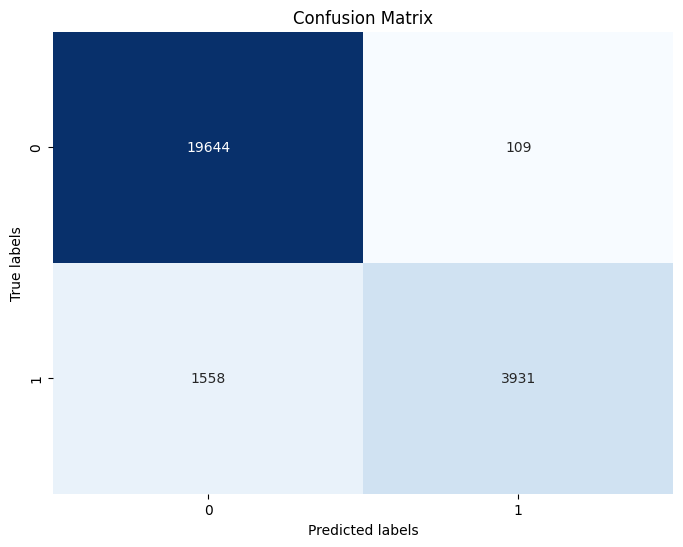

In [114]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_train_dropped, y_train_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Predict & Evaluate on Valid set

In [119]:
# Predicting on Valid set
y_valid_pred = reg_best.predict(X_valid_clean)

# Calculate the accuracy of the model on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred) * 100

print("accuracy_score on Training set: {:.2f}%".format(valid_accuracy))

accuracy_score on Training set: 92.72%


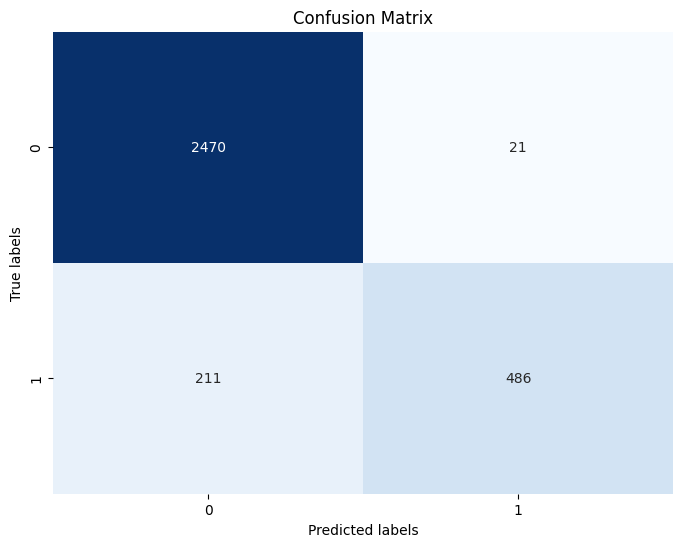

In [120]:
# Calculate the confusion matrix
cm_valid = confusion_matrix(y_valid, y_valid_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_valid, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### 4.2. Predict & evaluate on test data
---

In [121]:
# Predicting on Test set
y_test_pred = reg_best.predict(X_test_clean)

# Calculate the accuracy of the model on the validation set
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print("accuracy_score on Training set: {:.2f}%".format(test_accuracy))

accuracy_score on Training set: 92.16%


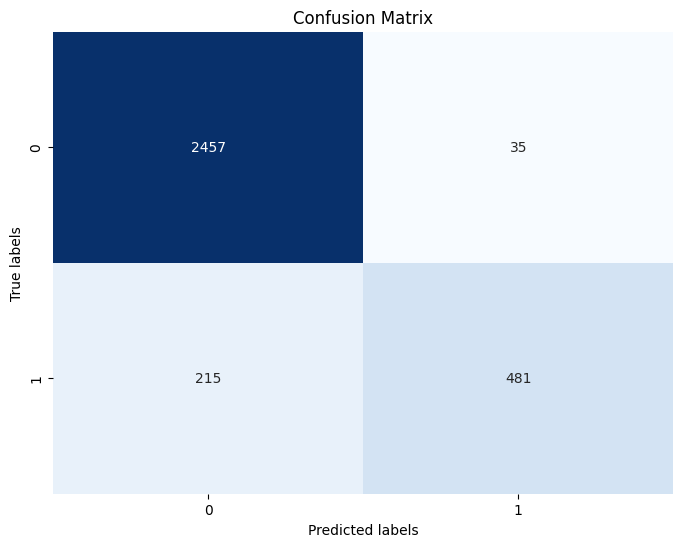

In [122]:
# Calculate the confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

aa